$\mathcal{P}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stan

from scipy import stats

plt.style.use('seaborn-darkgrid')

In [2]:
# Rodar esse comando antes de import a stan (pystan versão 3.x)
import nest_asyncio
nest_asyncio.apply()

In [3]:
# Data generating data
mu = 70
sigma = 100

data1 = stats.norm(mu, sigma).rvs(1000)

In [4]:
# Essa estrutura está definida na página 77 - SR2

model_data1 = """ 
    // Dado é a variável que foi medida!
    data {   
        int N;
        real y[N];
    }
    
    // Parâmetro é a váriável não observada.
    parameters {  
        real mu;
        real<lower=0> sigma;
    }
    
    model {
        mu ~ normal(60, 10);
        sigma ~ exponential(1);
        
        y ~ normal(mu, sigma);
    }
"""

stan_data1 = {
    'N': len(data1),
    'y': data1,
}

posteriori = stan.build(model_data1, data=stan_data1)
results_data1 = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_xqnjfb7o/model_czxgibzg.stan', line 15, column 20: Argument 60 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 2.8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.


  Adjust your expectations accordingly!


Inference of mu:  69.51944633163701  - Real value:  70
Inference of sigma:  94.70713134327357  - Real value:  100


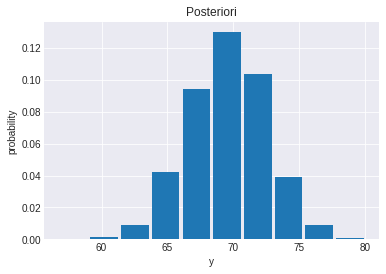

In [5]:
results_data1_mu = np.mean(results_data1['mu'])
results_data1_sigma = np.mean(results_data1['sigma'])

print('Inference of mu: ' , results_data1_mu, ' - Real value: ', mu)
print('Inference of sigma: ', results_data1_sigma, ' - Real value: ', sigma)

plt.hist(results_data1['mu'].flatten(), rwidth=0.9, density=True)
plt.title('Posteriori')
plt.xlabel('y')
plt.ylabel('probability')
plt.show()

### Stan -  Reference Manual

### 1. Comments Char

Comments line: `//` or `#`

Comments in block: `/* ... */`

### 2. Includes

Use `#include` to import stan file in another file.
For example, the `#include my-stan-file-function.stan` on top of file this will be replaced by content in `my-stan-file-function.stan`. 

### 3. Comments

Example:

```data {
  int<lower=0> N;  // number of observations
  array[N] real y;  // observations
}```

### 4. Whitespace

No indentation is need! 

### 5. Data Type and Declarations

All variables should be declared in data type, like c\c++.

Stan is strong and static typing:
1. Force the programmer's declarate a variable.
2. Checking erros in compile time and flags erros.
3. Don't propagate errors ever to the results.

#### 5.1 Overview of data type



**Two primitive data type**: `real` and `int`.


**Complex type**: `complex`, there is a complex number, real and imaginary component, both is `real`.


**Vector and Matrix type:**:  `vector` to column vector, `row_vector` to row vectors, and `matrix`. (To complex type, `complex_vector`, `complex_row_vector` and `complex_matrix`)


**Array types**: Any type can be made into an array type:
    
 - `array[5] real a;` Array, labeled `a`, that have 5 postions with real type;
 
 - `array[10, 2] int b;` Array with 10 lines and 2 columns of the int type, called `b`.
 
 - `array[10, 10, 5] matrix[3, 3] c;` Array with $[10, 10 , 5]$ positions to matrix$[3,3]$ format, called `c`.
 
 - `array[12, 8, 15] complex z;` Declare a array of the complex type.


**Constrained data type**: This variables are parameters, is helpful provided them  with constraints to aid internal check erros.

- `int<lower=0> N;`

- `real<upper=0> log_p;`

- `vector<lower=-1, upper=1>[3] rho;`


There are $4$ constrained vector data type:

1. `simplex` to simple units.

2. `unit-vector` to arrays\[ \] - unit-length vector.

3. `ordered` to ordered vectors.

4. `positive_ordered` to ordered positive vectors


And there are constrained to matrix data type:


1. `corr_matrix` for correlations matrices (*symmetric, positive definite, unit diagonal*)


2. `cov_matrix` for covariance matrices (*symmetric, positive definite*)


3. `cholesky_factor_cov` is the Cholesky factors of covariance matrices(*lower triangular, positive diagonal, product with own transpose is a covariance matrix*)


4. `cholesky_factor_corr` is the Cholesky factors of correlations matrices (*lower triangular, positive diagonal, unit-length rows*)


It's constrains will help check erros only in variables defined in the `data`, `transformed data`, `transformed parameters`, `generate quantities` blocks.

Unconstrained variable will be declared as real type (${\rm I\!R}^n$) by default. 

#### 5.2 Primitive numerical data type

**Integer Precision**: 32-bits (4-bytes) {$-2^{31}$, $2^{31} - 1$}

**Real Precision**: 64-bits (8-bytes), slightly larger than $+/- 10^{307} $, with until 15 decimal digits of accuracy.

**Not-a-number**: returns not-a-number functions errors if argument is not-a-number. And comparison operators: `not-a-number` == true, is *false* for every cases.

**Infinite values**: Great than all numbers, equivalent to negative case.

#### 5.3 Complex numerical data type

- `complex z = 2 - 1.3i;`

- `real re = get_real(z);  // re has value 2.0`

- `real im = get_imag(z);  // im has value -1.3`

Promoting real to complex:

- `real x = 5.0;`

- `complex z = x;  // get_real(z) == 5.0, get_imag(z) == 0`

#### 5.4 Scalar datatype and variable declarations

- `int N;`  Unconstrained

-  `int<lower=1> N;`  $N >= 1, \forall$ $N$ in $\mathbb{Z} $

- `int<lower=0, upper=1> cond;`  $\{0, 1\}$ 

- `real<lower=0> sigma;` $\sigma >=0 $

- `real<upper=-1> x;` $x <= -1$

- `real<lower=-1, upper=1> rho;` $-1 <= \rho <= 1$

- `positive_infinity()` and `negative_infinty()` could be use to set limits, but this values are ignored in Stan.

**Affinely transformed real**: The transformation:
$$x ↦ \mu + \sigma * x$$

- $\mu$: Offset

- $\sigma$: Multiplier (positive)

Like constraint declarations, making the sampling process more efficient. Like a soft constraint:


- `real<offset=1> x;`   $1 + 1 \times x$

- `real<multiplier=2>;`   $0 + 2\times x$

- `real<offset=1, multiplier=2> x;`   $1 + 2\times x$


Example:

```
parameters {
  real<offset=mu, multiplier=sigma> x;
}
model {
  x ~ normal(mu, sigma);
}

```

The theorical model that received the data from $x ~ normal(0, 1)$, can writer in stan model like:

```
parameter {
    real x;  // This x ~ normal(0, 1)
}

model {
    x ~ normal(mu, sigma);
}
```

this code is equivalent to:

```
parameter {
    real<offset=0, multiplier=1> x;  // This x ~ normal(0, 1)
}
model {
    x ~ normal(mu, sigma);
}
```

**Expressions as bounds and offset/multiplier**: We can use the variables, that have been declared before, to setting the values of the offset and multiplier.

```
data {
    real lb;
}
 
parameters {
    rea<lower=lb> phi;
}
```

Variables used in constraints can be any variable that has been defined at the point the constraint is used. For instance:

```
data {
   int<lower=1> N;
   array[N] real y;
}
parameters {
   real<lower=min(y), upper=max(y)> phi;
}
```

**Declaring optional variable**: Variable that depends on a boolean constant.

```
data {
    int<lower=0, upper=1> include_alpha;   // Only {0, 1}
}
parameters {
    vector[include_alpha ? N : 0] alpha;
}
```

If `include_alpha == True` then `alpha` vector exists, else  it will be exclude in output results automaticaly.

#### 5.5 Vector and matrix data types

Three types of container objects: `arrays`, `vector` and `matrix`. Vector and matrices are structure limited, vector 1-dimensional real or complex values. Matrix that two dimensional. Array is not matrix.